In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
# when reading in the dataset, we have a large number of bad rows. error_bad_lines removes these...
accre_df = pd.read_csv('../data/accre-jobs-2020.csv', error_bad_lines=False)

accre_df = accre_df.iloc[1:]

b'Skipping line 3461: expected 13 fields, saw 15\nSkipping line 3462: expected 13 fields, saw 16\nSkipping line 3465: expected 13 fields, saw 15\nSkipping line 3468: expected 13 fields, saw 16\nSkipping line 3472: expected 13 fields, saw 15\nSkipping line 3476: expected 13 fields, saw 16\nSkipping line 3479: expected 13 fields, saw 14\nSkipping line 3482: expected 13 fields, saw 14\nSkipping line 3486: expected 13 fields, saw 14\nSkipping line 3490: expected 13 fields, saw 14\nSkipping line 3494: expected 13 fields, saw 14\nSkipping line 3495: expected 13 fields, saw 16\nSkipping line 3497: expected 13 fields, saw 14\nSkipping line 3498: expected 13 fields, saw 14\nSkipping line 3499: expected 13 fields, saw 14\nSkipping line 3505: expected 13 fields, saw 14\nSkipping line 3517: expected 13 fields, saw 16\nSkipping line 3526: expected 13 fields, saw 15\nSkipping line 3528: expected 13 fields, saw 15\nSkipping line 3529: expected 13 fields, saw 15\nSkipping line 3530: expected 13 fields

b'Skipping line 396605: expected 13 fields, saw 14\nSkipping line 397416: expected 13 fields, saw 14\nSkipping line 398947: expected 13 fields, saw 14\nSkipping line 402958: expected 13 fields, saw 14\nSkipping line 410134: expected 13 fields, saw 14\nSkipping line 410135: expected 13 fields, saw 14\nSkipping line 410136: expected 13 fields, saw 14\nSkipping line 410137: expected 13 fields, saw 14\nSkipping line 410140: expected 13 fields, saw 14\nSkipping line 410165: expected 13 fields, saw 14\nSkipping line 410166: expected 13 fields, saw 14\nSkipping line 410168: expected 13 fields, saw 14\nSkipping line 410169: expected 13 fields, saw 14\nSkipping line 410170: expected 13 fields, saw 14\nSkipping line 410171: expected 13 fields, saw 14\nSkipping line 410172: expected 13 fields, saw 14\nSkipping line 410173: expected 13 fields, saw 14\nSkipping line 410174: expected 13 fields, saw 14\nSkipping line 410175: expected 13 fields, saw 16\nSkipping line 410176: expected 13 fields, saw 16

b'Skipping line 791715: expected 13 fields, saw 14\nSkipping line 791716: expected 13 fields, saw 14\nSkipping line 791946: expected 13 fields, saw 14\nSkipping line 802071: expected 13 fields, saw 36\nSkipping line 803524: expected 13 fields, saw 14\nSkipping line 803526: expected 13 fields, saw 16\nSkipping line 803532: expected 13 fields, saw 14\nSkipping line 805310: expected 13 fields, saw 14\nSkipping line 807766: expected 13 fields, saw 16\nSkipping line 807886: expected 13 fields, saw 14\nSkipping line 807912: expected 13 fields, saw 14\nSkipping line 807915: expected 13 fields, saw 16\nSkipping line 809885: expected 13 fields, saw 16\nSkipping line 810653: expected 13 fields, saw 15\nSkipping line 819442: expected 13 fields, saw 14\nSkipping line 820633: expected 13 fields, saw 15\nSkipping line 821828: expected 13 fields, saw 17\nSkipping line 821846: expected 13 fields, saw 24\nSkipping line 821852: expected 13 fields, saw 20\nSkipping line 821853: expected 13 fields, saw 20

b'Skipping line 1386352: expected 14 fields, saw 31\nSkipping line 1410576: expected 14 fields, saw 20\nSkipping line 1410942: expected 14 fields, saw 19\nSkipping line 1419277: expected 14 fields, saw 18\nSkipping line 1421945: expected 14 fields, saw 16\nSkipping line 1422429: expected 14 fields, saw 16\nSkipping line 1422430: expected 14 fields, saw 16\nSkipping line 1422431: expected 14 fields, saw 16\nSkipping line 1422432: expected 14 fields, saw 16\nSkipping line 1422433: expected 14 fields, saw 15\nSkipping line 1422434: expected 14 fields, saw 15\nSkipping line 1422435: expected 14 fields, saw 15\nSkipping line 1422436: expected 14 fields, saw 15\nSkipping line 1422437: expected 14 fields, saw 16\nSkipping line 1422439: expected 14 fields, saw 15\nSkipping line 1422542: expected 14 fields, saw 16\nSkipping line 1425142: expected 14 fields, saw 31\nSkipping line 1425366: expected 14 fields, saw 34\nSkipping line 1425553: expected 14 fields, saw 29\nSkipping line 1426269: expect

b'Skipping line 2261236: expected 14 fields, saw 15\nSkipping line 2261237: expected 14 fields, saw 15\nSkipping line 2261238: expected 14 fields, saw 15\nSkipping line 2261244: expected 14 fields, saw 15\nSkipping line 2268336: expected 14 fields, saw 15\nSkipping line 2277496: expected 14 fields, saw 15\nSkipping line 2280917: expected 14 fields, saw 15\nSkipping line 2281022: expected 14 fields, saw 16\nSkipping line 2282606: expected 14 fields, saw 17\nSkipping line 2288483: expected 14 fields, saw 16\nSkipping line 2288537: expected 14 fields, saw 16\nSkipping line 2290814: expected 14 fields, saw 16\nSkipping line 2290957: expected 14 fields, saw 16\nSkipping line 2290958: expected 14 fields, saw 17\nSkipping line 2290959: expected 14 fields, saw 17\nSkipping line 2290961: expected 14 fields, saw 15\nSkipping line 2290962: expected 14 fields, saw 16\nSkipping line 2290963: expected 14 fields, saw 17\nSkipping line 2290966: expected 14 fields, saw 15\nSkipping line 2291056: expect

b'Skipping line 2442910: expected 14 fields, saw 35\nSkipping line 2442911: expected 14 fields, saw 41\nSkipping line 2442917: expected 14 fields, saw 66\nSkipping line 2448023: expected 14 fields, saw 16\nSkipping line 2451107: expected 14 fields, saw 16\n'
b'Skipping line 2502554: expected 14 fields, saw 16\nSkipping line 2534850: expected 14 fields, saw 70\n'
b'Skipping line 2562208: expected 14 fields, saw 53\nSkipping line 2562316: expected 14 fields, saw 40\nSkipping line 2572545: expected 14 fields, saw 70\nSkipping line 2588986: expected 14 fields, saw 23\nSkipping line 2593292: expected 14 fields, saw 53\nSkipping line 2615271: expected 14 fields, saw 66\n'
b'Skipping line 2685754: expected 14 fields, saw 20\n'
b'Skipping line 2698454: expected 14 fields, saw 23\nSkipping line 2732644: expected 14 fields, saw 39\n'
b'Skipping line 2757408: expected 14 fields, saw 15\nSkipping line 2757409: expected 14 fields, saw 19\nSkipping line 2757417: expected 14 fields, saw 26\nSkipping 

In [6]:
accre_df.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440
5,16297022,treviso,arabella,122880Mn,65183.02M,13-18:00:00,12-02:31:43,1,24,production,0:0,COMPLETED,cn1443


In [7]:
accre_df.tail()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
3813588,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312
3813589,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312
3813590,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2,production,0:0,COMPLETED,cn368
3813591,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8,production,0:0,RUNNING,cn1509
3813592,24173866,horseradish,ariane,20480Mn,0,05:00:00,00:02:05,1,1,production,0:0,RUNNING,cn1131


In [8]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813592 entries, 1 to 3813592
Data columns (total 13 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   ACCOUNT    object
 2   USER       object
 3   REQMEM     object
 4   USEDMEM    object
 5   REQTIME    object
 6   USEDTIME   object
 7   NODES      int64 
 8   CPUS       int64 
 9   PARTITION  object
 10  EXITCODE   object
 11  STATE      object
 12  NODELIST   object
dtypes: int64(2), object(11)
memory usage: 378.2+ MB


#### Need to change NODES and CPU to integers

In [9]:
accre_df['NODES'] = accre_df['NODES'].astype(int)
accre_df['CPUS'] = accre_df['CPUS'].astype(int)

In [10]:
accre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813592 entries, 1 to 3813592
Data columns (total 13 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   ACCOUNT    object
 2   USER       object
 3   REQMEM     object
 4   USEDMEM    object
 5   REQTIME    object
 6   USEDTIME   object
 7   NODES      int64 
 8   CPUS       int64 
 9   PARTITION  object
 10  EXITCODE   object
 11  STATE      object
 12  NODELIST   object
dtypes: int64(2), object(11)
memory usage: 378.2+ MB


In [11]:
accre_df['ACCOUNT'].value_counts()

cms              807408
cep              609278
summer           380788
galia            198180
carrot           192524
orange           158400
cms_lowprio      135681
casaba           117720
portabella       110139
bunch            105877
cmsadmin         102589
bulk              78736
boysenberries     57599
sharlin           57378
horseradish       53705
grisette          42443
sweet             40241
mixed             39315
retailer          39052
key               37711
round             36830
wood              32245
savoy             30508
sprite            25892
atemoyas          25020
winged            23998
garlic            20350
wax               19623
celery            17399
alkmene           15583
sunburst          14249
fresh             11981
chickpeas         10828
regal             10497
large             10411
turban            10034
texas              9769
basil              9768
belle              8645
clara              8400
endive             8339
bertanne        

In [12]:
accre_df['STATE'].value_counts()

COMPLETED              3802158
CANCELLED                 6041
RUNNING                   3108
FAILED                    1282
CANCELLED by 686562        681
OUT_OF_MEMORY               81
TIMEOUT                     80
CANCELLED by 505355         63
CANCELLED by 855431         17
CANCELLED by 782611         13
CANCELLED by 9206            9
CANCELLED by 397600          7
CANCELLED by 200557          6
CANCELLED by 0               5
CANCELLED by 454080          4
CANCELLED by 9202            3
CANCELLED by 199766          3
CANCELLED by 649319          3
CANCELLED by 9201            3
CANCELLED by 546080          2
CANCELLED by 791651          2
CANCELLED by 895426          2
CANCELLED by 199066          2
CANCELLED by 90423           2
CANCELLED by 124006          2
CANCELLED by 666860          2
CANCELLED by 693461          2
CANCELLED by 483348          1
CANCELLED by 651701          1
CANCELLED by 337422          1
CANCELLED by 785271          1
CANCELLED by 763605          1
CANCELLE

In [13]:
accre_df['PARTITION'].value_counts()

production              3309123
nogpfs                   327652
sam                       79151
pascal                    47997
turing                    39402
debug                      6738
maxwell                    3326
cgw-capra1                   83
cgw-dougherty1               72
cgw-cqs1                     34
cgw-vm-qa-flatearth1          4
cgw-cqs3                      4
devel                         2
cgw-tbi01                     2
cgw-rocksteady                2
Name: PARTITION, dtype: int64

#### Do any of the production partition nodes show an unusual number of failed jobs relative to the others? (Ignore Debug Partition)

Let's check to see failure by nodes in the production partition

In [31]:
accre_df_failures = accre_df[
    (accre_df['STATE'] == 'FAILED') &
    (accre_df['PARTITION'] == 'production')
]

accre_df_failures = accre_df_failures.reset_index()

accre_df_failures.head(10)

,index,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,124262,17261993,burro,golda,1024Mc,0,00:30:00,00:00:01,1,1,production,13:0,FAILED,cn394
1,378485,17580030,plantain,margret,4096Mn,0,04:00:00,00:00:04,1,8,production,1:0,FAILED,cn469
2,390705,17586972,plantain,margret,4096Mn,0,01:00:00,00:00:01,1,8,production,1:0,FAILED,cn1446
3,390735,17587057,plantain,margret,4096Mn,11M,01:00:00,00:09:46,1,8,production,1:0,FAILED,cn1446
4,392161,17591510,plantain,margret,4096Mn,0,01:00:00,00:00:03,1,8,production,1:0,FAILED,cn1431
5,392781,17593788,plantain,margret,4096Mn,12.75M,01:00:00,00:32:53,1,8,production,1:0,FAILED,cn1212
6,424735,17658358,sunburst,rufus,10240Mc,2098.61M,05:00:00,00:27:42,1,1,production,127:0,FAILED,cn1273
7,427117,17663179,pasilla,earlean,12288Mn,0,7-00:00:00,00:00:01,3,4,production,13:0,FAILED,cn[1332-1334]
8,480355,17748183,pasilla,booker,16384Mn,4.50M,7-00:00:00,00:00:06,1,16,production,6:0,FAILED,cn1471
9,530638,17830258,tips,ole,20480Mn,3.47M,00:40:00,00:00:03,1,12,production,1:0,FAILED,cn1301


In [150]:
accre_df_failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      395 non-null    int64 
 1   JOBID      395 non-null    object
 2   ACCOUNT    395 non-null    object
 3   USER       395 non-null    object
 4   REQMEM     395 non-null    object
 5   USEDMEM    395 non-null    object
 6   REQTIME    395 non-null    object
 7   USEDTIME   395 non-null    object
 8   NODES      395 non-null    int64 
 9   CPUS       395 non-null    int64 
 10  PARTITION  395 non-null    object
 11  EXITCODE   395 non-null    object
 12  STATE      395 non-null    object
 13  NODELIST   395 non-null    object
dtypes: int64(3), object(11)
memory usage: 43.3+ KB


We started with 3,813,592 in our dataset and are now down to 395 failures after whittling it down to failures in the production partition. We're looking at a failure rate of .01%

In [33]:
accre_df_failures['NODELIST'].value_counts().head(20)

cn1273           9
cn1458           6
cn304            6
cn1364           6
cn1270           5
cn[1530-1531]    5
cn1450           5
cn1479           5
cn1449           4
cn1278           4
cn1436           4
cn1267           4
cn1275           4
cn1448           4
cn[1468-1469]    4
cn[1284-1286]    4
cn1433           3
cn1430           3
cn382            3
cn[1297-1298]    3
Name: NODELIST, dtype: int64

In [147]:
# create DF from value_counts by renaming the axis and reseting the index
failures_by_nodelist = accre_df_failures['NODELIST'].value_counts().rename_axis('NODELIST').reset_index(name='COUNTS')
failures_by_nodelist.head()

,NODELIST,COUNTS
0,cn1273,9
1,cn1458,6
2,cn304,6
3,cn1364,6
4,cn1270,5


In [149]:
failures_by_nodelist['COUNTS'].mean()

1.6952789699570816

The average number of failures by node in this list 1.69

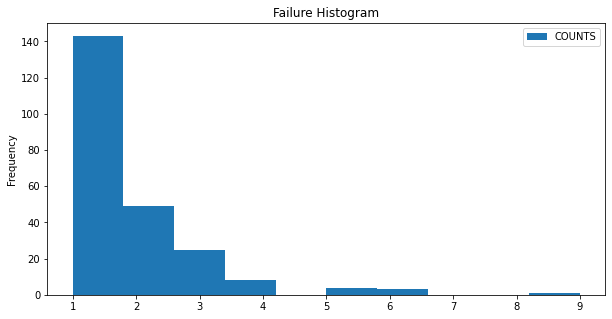

In [35]:
failures_by_nodelist.plot(kind = 'hist', title = 'Failure Histogram', figsize = (10, 5));

As you can see from the histogram, we have 1 outliers off to the right with some others that are failing more regularly

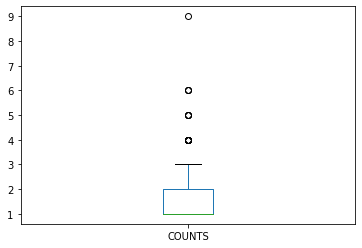

In [156]:
failures_by_nodelist.plot(kind='box');

Nodes that fail more than 3 times are considered outliers!

In [164]:
failures_by_nodelist[failures_by_nodelist['COUNTS'] > 3]

,NODELIST,COUNTS
0,cn1273,9
1,cn1458,6
2,cn304,6
3,cn1364,6
4,cn1270,5
5,cn[1530-1531],5
6,cn1450,5
7,cn1479,5
8,cn1449,4
9,cn1278,4


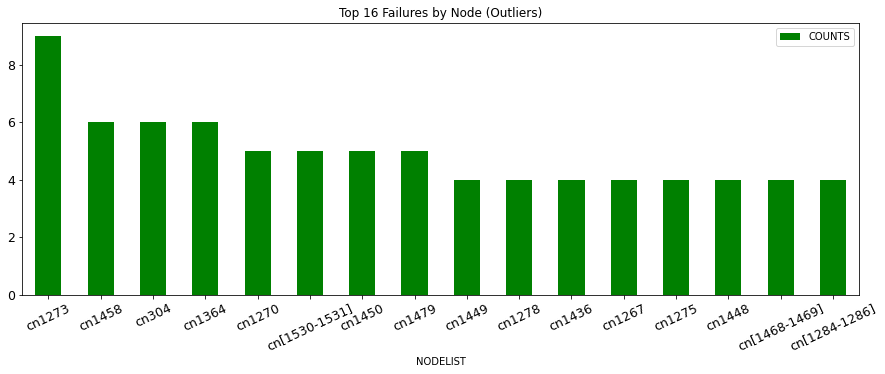

In [166]:
failures_by_nodelist.head(16).plot(
    kind = 'bar', 
    x = 'NODELIST',
    y = 'COUNTS',
    title = 'Top 16 Failures by Node (Outliers)',
    color = 'green', 
    figsize = (15,5),
    rot = 25, 
    fontsize = 12.5
);

Let's look at cn1273 specifically

In [37]:
cn1273_df = accre_df_failures[accre_df_failures['NODELIST'] == 'cn1273']
cn1273_df

,index,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
6,424735,17658358,sunburst,rufus,10240Mc,2098.61M,05:00:00,00:27:42,1,1,production,127:0,FAILED,cn1273
232,1959968,20477753_1,carrot,bryon,16384Mc,3.37M,00:30:00,00:00:09,1,2,production,1:0,FAILED,cn1273
271,2459717,21521374,retailer,justine,1024Mc,1.87M,00:30:00,00:04:06,1,1,production,127:0,FAILED,cn1273
373,3653534,23878410,plantain,doctor,10240Mn,0,00:15:00,00:00:00,1,4,production,2:0,FAILED,cn1273
374,3653999,23878740,plantain,doctor,10240Mn,0,00:15:00,00:00:00,1,4,production,2:0,FAILED,cn1273
375,3654003,23878744,plantain,doctor,10240Mn,0,00:15:00,00:00:01,1,4,production,2:0,FAILED,cn1273
376,3654011,23878756,plantain,doctor,10240Mn,0,00:15:00,00:00:00,1,4,production,2:0,FAILED,cn1273
377,3654028,23878814,plantain,doctor,10240Mn,0,00:15:00,00:00:17,1,4,production,1:0,FAILED,cn1273
378,3654100,23878957,plantain,doctor,10240Mn,558.93M,00:15:00,00:15:07,1,4,production,1:0,FAILED,cn1273


According to the Exit Codes, all of the jobs failured due to user error for cn1273! Perhaps we should only look into failures that occured due to the job or node (ex: Exit Code 0:1) 

In [46]:
accre_df_failures[accre_df_failures['EXITCODE'].str.startswith('0:')]

,index,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST


Looks like every failure in the Production partition is due to user error. Let's see what accounts need the most help to avoid future failure

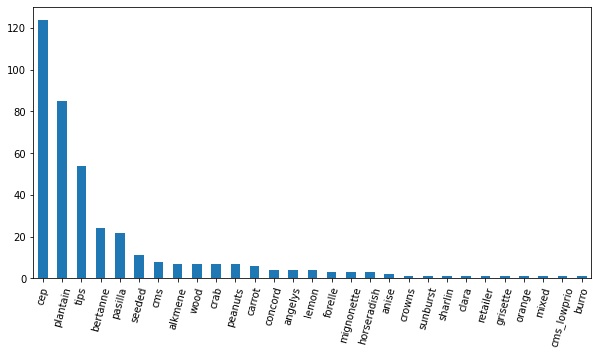

In [85]:
accre_df_failures['ACCOUNT'].value_counts().plot(kind ='bar', figsize=(10,5), rot=75);

In [153]:
accre_df_failures_by_account = accre_df_failures['ACCOUNT'].value_counts()
accre_df_failures_by_account

cep            124
plantain        85
tips            54
bertanne        24
pasilla         22
seeded          11
cms              8
alkmene          7
wood             7
crab             7
peanuts          7
carrot           6
concord          4
angelys          4
lemon            4
forelle          3
mignonette       3
horseradish      3
anise            2
crowns           1
sunburst         1
sharlin          1
clara            1
retailer         1
grisette         1
orange           1
mixed            1
cms_lowprio      1
burro            1
Name: ACCOUNT, dtype: int64

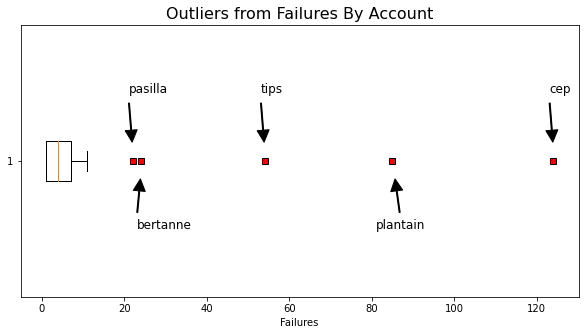

In [152]:
red_square = dict(markerfacecolor='r', marker='s')

plt.figure(figsize = (10,5))
plt.title('Outliers from Failures By Account', fontsize=16)
plt.xlabel('Failures')
plt.annotate(s = 'cep', xy = (124, 1.05), fontsize = 12,
             xytext = (123, 1.25), arrowprops=dict(facecolor='black', shrink=0.1, width=1))
plt.annotate(s = 'plantain', xy = (85.5, .95), fontsize = 12,
             xytext = (81, .75), arrowprops=dict(facecolor='black', shrink=0.1, width = 1))
plt.annotate(s = 'tips', xy = (54, 1.05), fontsize = 12,
             xytext = (53, 1.25), arrowprops=dict(facecolor='black', shrink=0.1, width = 1))
plt.annotate(s = 'bertanne', xy = (24, .95), fontsize = 12,
             xytext = (23, .75), arrowprops=dict(facecolor='black', shrink=0.1, width = 1))
plt.annotate(s = 'pasilla', xy = (22, 1.05), fontsize = 12,
             xytext = (21, 1.25), arrowprops=dict(facecolor='black', shrink=0.1, width = 1))
plt.boxplot(accre_df_failures_by_account,  
            vert = False, 
            flierprops=red_square);